<a href="https://colab.research.google.com/github/sarilacivert/Proje/blob/master/A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_6_a 

In [4]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os

import logging
logging.getLogger('tensorflow').disabled = True

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [5]:
import tensorflow as tf

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print (X_train.shape)
print (X_test.shape)

(60000, 784)
(10000, 784)


Training data shape (60000, 784)


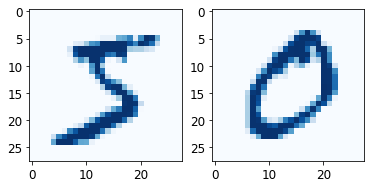

In [8]:
print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Blues);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Blues);

In [9]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8.5,8.5))
    ax = fig.add_subplot(112)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

### First model with 2 layers and 10 Neurons for each layer

In [10]:
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf_2a = tf.estimator.DNNClassifier(hidden_units=[10,10], n_classes=10,feature_columns=feature_cols)


input_fn_2a = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)

dnn_clf_2a.train(input_fn=input_fn_2a)

AttributeError: ignored